# DATA VISUALIZATION TERM PROJECT: MOST STREAMED SPOTIFY SONGS


## MUHAMMET ÖZTÜRK-150200328
## ULAŞ POLAT-150200322

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

## Reading dataset

In [ ]:
df = pd.read_csv("spotify-2023.csv", encoding='latin-1')
df.T.head(30)

,0,1,2,3,4,5,6,7,8,9,...,943,944,945,946,947,948,949,950,951,952
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES,Sprinter,Ella Baila Sola,Columbia,fukumean,La Bebe - Remix,...,Privileged Rappers,The Astronaut,BackOutsideBoyz,Broke Boys,The Great War,My Mind & Me,Bigger Than The Whole Sky,A Veces (feat. Feid),En La De Ella,Alone
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny,"Dave, Central Cee","Eslabon Armado, Peso Pluma",Quevedo,Gunna,"Peso Pluma, Yng Lvcas",...,"Drake, 21 Savage",Jin,Drake,"Drake, 21 Savage",Taylor Swift,Selena Gomez,Taylor Swift,"Feid, Paulo Londra","Feid, Sech, Jhayco",Burna Boy
artist_count,2,1,1,1,1,2,2,1,1,2,...,2,1,1,2,1,1,1,2,3,1
released_year,2023,2023,2023,2019,2023,2023,2023,2023,2023,2023,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
released_month,7,3,6,8,5,6,3,7,5,3,...,11,10,11,11,10,11,10,11,10,11
released_day,14,23,30,23,18,1,16,7,15,17,...,4,28,4,4,21,3,21,3,20,4
in_spotify_playlists,553,1474,1397,7858,3133,2186,3090,714,1096,2953,...,1007,481,1045,1060,1274,953,1180,573,1320,782
in_spotify_charts,147,48,113,100,50,91,50,43,83,44,...,0,9,0,0,0,0,0,0,0,2
streams,141381703,133716286,140003974,800840817,303236322,183706234,725980112,58149378,95217315,553634067,...,112436403,203436468,93367537,106249219,181382590,91473363,121871870,73513683,133895612,96007391
in_apple_playlists,43,48,94,116,84,67,34,25,60,49,...,6,10,8,3,1,61,4,2,29,27


## Inspecting data
Inspecting datatypes and find missing/duplicated values.



In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
print(df.isna().sum())
print("\nDuplicated rows: ",df.duplicated().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Duplicated rows:  0


## Data cleaning
Change missing data and convert features to appropriate data type.



In [5]:
# Remove commas
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

# Convert to numeric format
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# Fill NaN values with zeros
df['in_deezer_playlists'].fillna(0, inplace=True)

# Fill the 'key' column with '-'
df['key'].fillna('-', inplace=True)

# Drop rows with missing values from the DataFrame
#df.dropna(inplace=True)

In [6]:
print("Missing values: ",df.isna().sum().sum())
print("Duplicated rows: ",df.duplicated().sum())

Missing values:  50
Duplicated rows:  0


# EDA

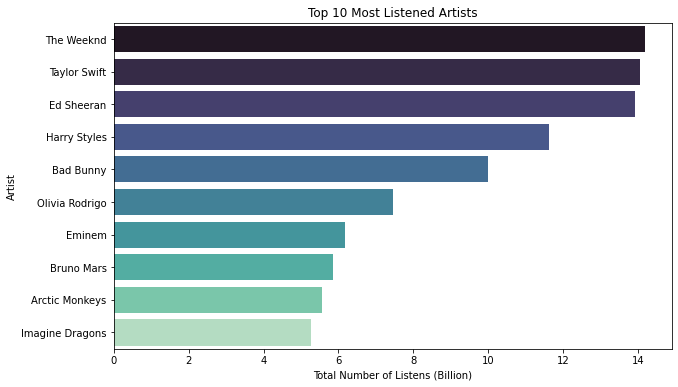

In [7]:
# Convert 'streams' column to numeric (ignore errors to handle non-numeric values)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows with missing or non-numeric values in 'streams'
df = df.dropna(subset=['streams'])

# Create a 'streams_million' column by dividing 'streams' by a million
df['streams_billion'] = df['streams'] / 1e9  # 1e9 represents one billion

# Group by artist and sum up the streams
top_artists = df.groupby('artist(s)_name')['streams_billion'].sum().reset_index().sort_values('streams_billion', ascending=False).head(10)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='streams_billion', y='artist(s)_name', data=top_artists, palette='mako')

# Plot adjustments
plt.title('Top 10 Most Listened Artists')
plt.xlabel('Total Number of Listens (Billion)')
plt.ylabel('Artist')
plt.show()


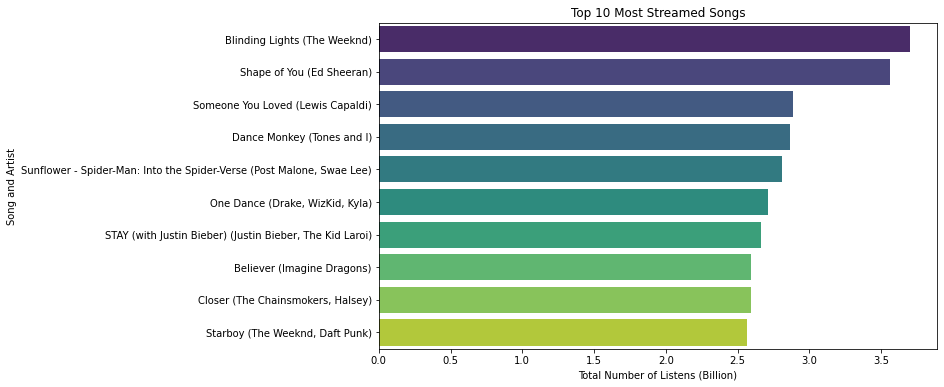

In [8]:
# Convert the 'streams' column to billions of listens
df['streams_billion'] = df['streams'] / 1e9  # 1e9 represents one billion

# Sort the data by the 'streams_billion' column and take the top 10 rows
top_songs = df.sort_values(by='streams_billion', ascending=False).head(10)

# Append the artist's name in parentheses to the song title
top_songs['song_artist'] = top_songs['track_name'] + ' (' + top_songs['artist(s)_name'] + ')'

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='streams_billion', y='song_artist', data=top_songs, palette='viridis')

# Plot adjustments
plt.title('Top 10 Most Streamed Songs')
plt.xlabel('Total Number of Listens (Billion)')
plt.ylabel('Song and Artist')
plt.show()

## Spider Plot

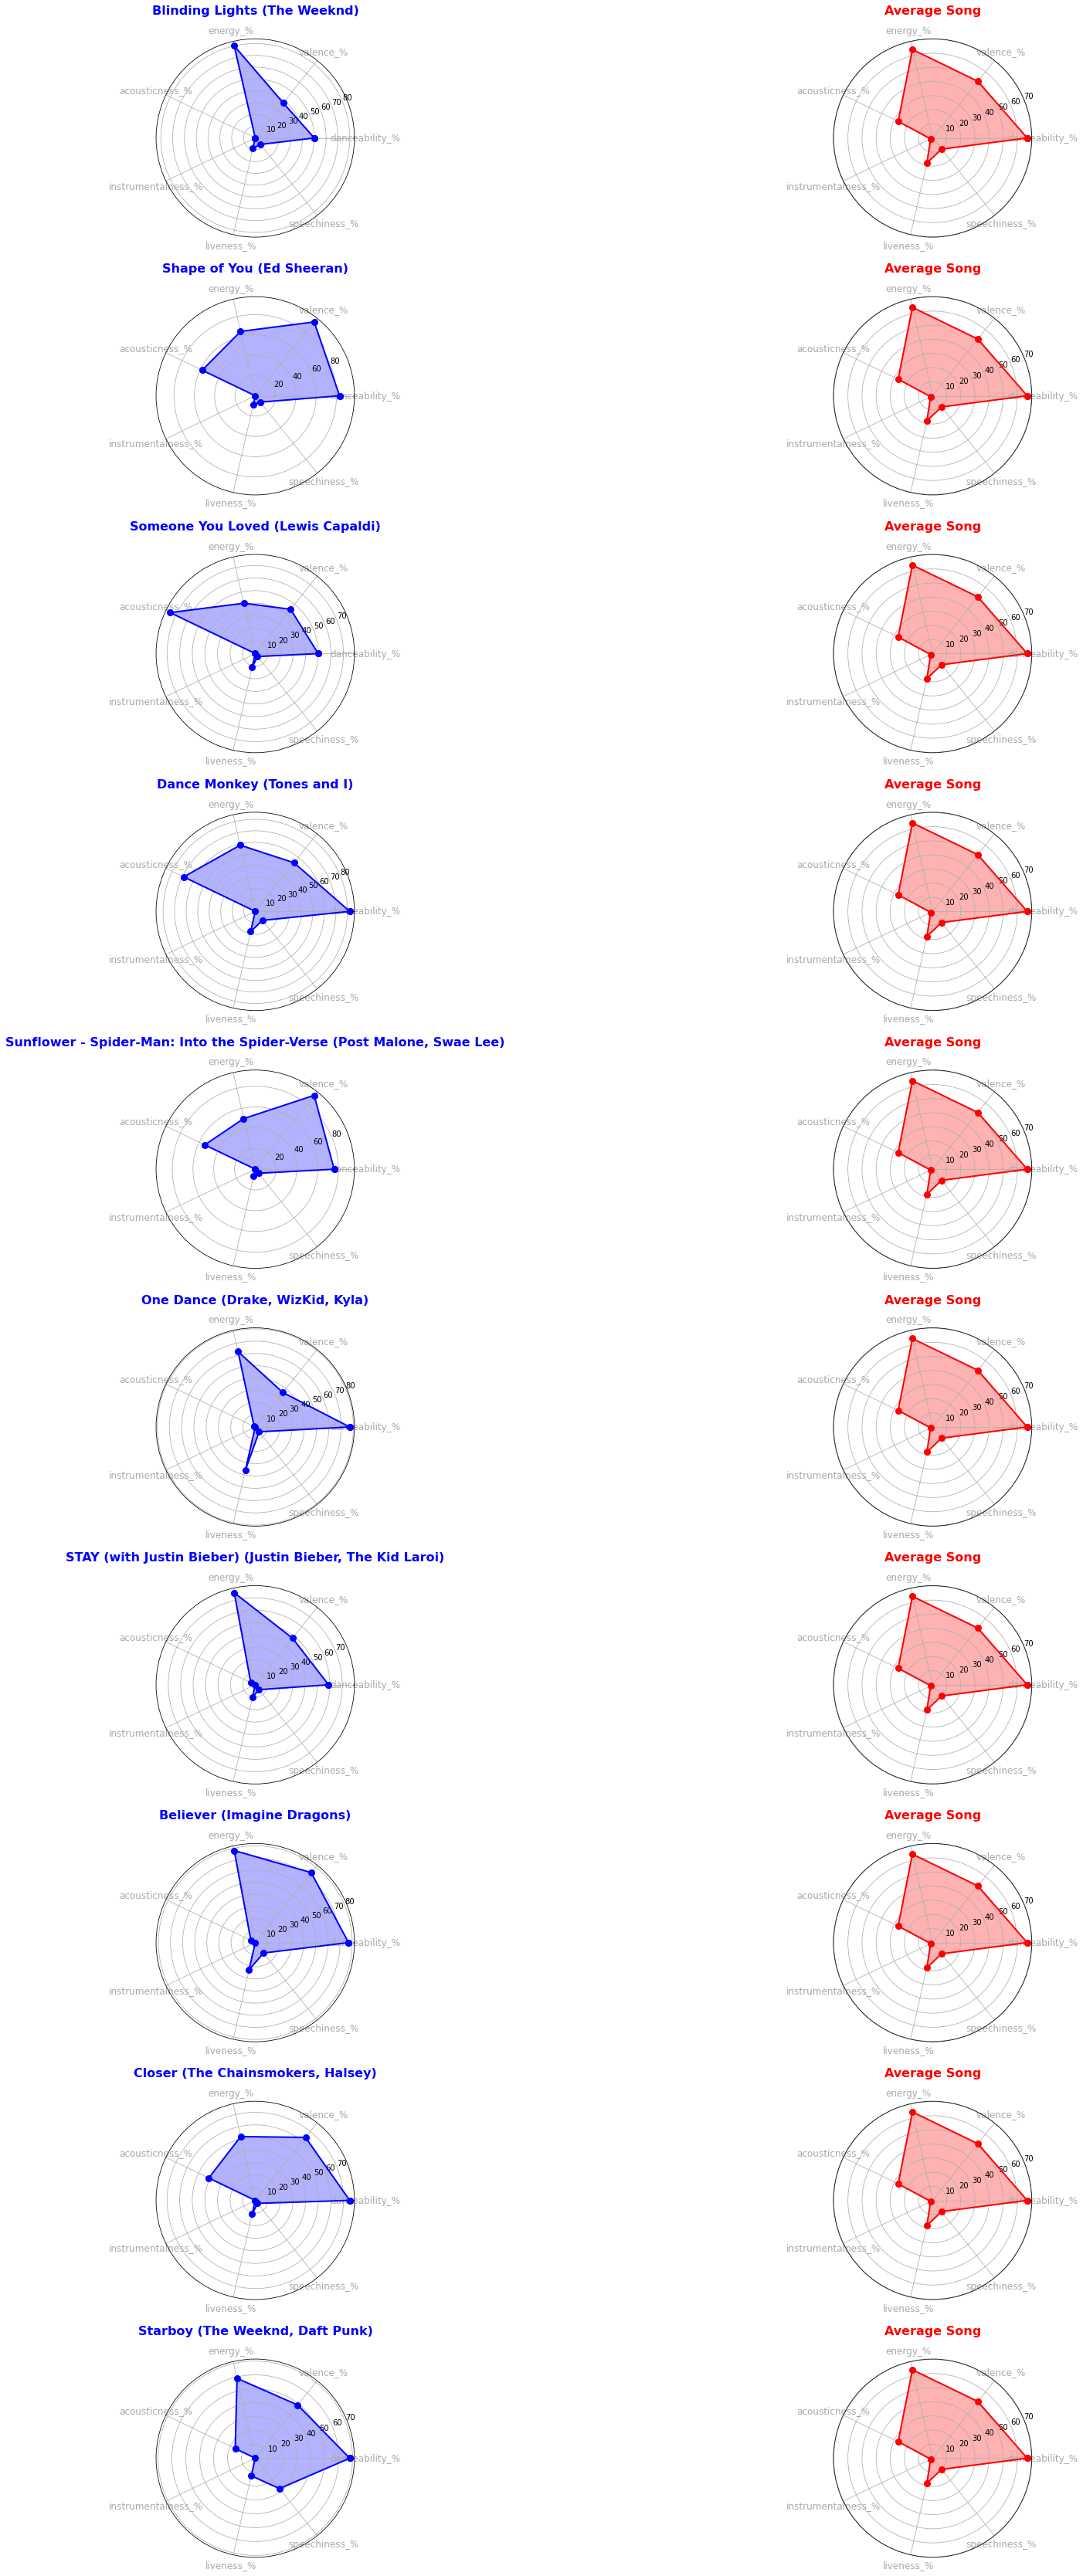

In [47]:
# Append the artist's name in parentheses to the song title
top_songs['song_artist'] = top_songs['track_name'] + ' (' + top_songs['artist(s)_name'] + ')'

# Function to create a spider plot for a given song
def create_spider_plot(song_row, ax, color, title):
    categories = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
    N = len(categories)
    
    # Convert values to a list and append the first value to close the circular graph
    values = song_row[categories].values.flatten().tolist()
    values += values[:1]
    
    # Compute the angle of each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Plot
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', marker='o', markersize=8)  # Added markers for better visibility
    ax.fill(angles, values, color=color, alpha=0.3)  # Set a lighter fill color
    
    # Add song title
    ax.set_title(title, size=16, color=color, y=1.1, fontweight='bold')
    
    # Add labels for each feature
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='darkgrey', size=12, fontweight='light')

# Create subplots
fig, axs = plt.subplots(nrows=len(top_songs), ncols=2, figsize=(30, 60), subplot_kw=dict(polar=True))

# Create a spider plot for each song and the average side by side
for i, (index, row) in enumerate(top_songs.iterrows()):
    create_spider_plot(row, axs[i, 0], 'blue', row['song_artist'])  # Individual song with a uniform blue color
    average_song = df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()
    create_spider_plot(average_song, axs[i, 1], 'red', 'Average Song')  # Average song

# Adjust spacing for better layout
plt.subplots_adjust(hspace=0.3, wspace=0.1)  # Decrease spacing between plots
plt.show()


The axes of the charts represent different characteristics of the songs, such as energy, danceability, instrumentalness, liveness, valence, and acousticness, among others. The filled areas represent the level to which each song exhibits these characteristics — the larger the area covered, the higher the song scores on those particular attributes

## Cosine Similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Define the features we are interested in
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calculate the average song features
average_song_features = average_song[features].values.reshape(1, -1)

# Calculate the cosine similarity for each song in the top 10
for i, (index, row) in enumerate(top_songs.iterrows()):
    song_features = row[features].values.reshape(1, -1)
    similarity = cosine_similarity(average_song_features, song_features)
    print(f"Cosine similarity between '{row['song_artist']}' and the average song: {similarity[0][0]}")


Cosine similarity between 'Blinding Lights (The Weeknd)' and the average song: 0.9359252757232949
Cosine similarity between 'Shape of You (Ed Sheeran)' and the average song: 0.9603302223283748
Cosine similarity between 'Someone You Loved (Lewis Capaldi)' and the average song: 0.8659713239146299
Cosine similarity between 'Dance Monkey (Tones and I)' and the average song: 0.951830617867942
Cosine similarity between 'Sunflower - Spider-Man: Into the Spider-Verse (Post Malone, Swae Lee)' and the average song: 0.9380842399005629
Cosine similarity between 'One Dance (Drake, WizKid, Kyla)' and the average song: 0.9453037060141746
Cosine similarity between 'STAY (with Justin Bieber) (Justin Bieber, The Kid Laroi)' and the average song: 0.9655562957049818
Cosine similarity between 'Believer (Imagine Dragons)' and the average song: 0.9727886938496332
Cosine similarity between 'Closer (The Chainsmokers, Halsey)' and the average song: 0.9770103640972133
Cosine similarity between 'Starboy (The Week

Cosine similarity measures the cosine of the angle between two vectors. This measurement determines how similar two vectors are.

The cosine similarity between two vectors is calculated using the following formula:

$$\text{cosine similarity} = \frac{A \cdot B}{||A|| ||B||}$$

Here:
- $A \cdot B$ represents the dot product of the two vectors,
- $||A||$ and $||B||$ represent the magnitudes of vectors $A$ and $B$ respectively.

This formula determines how close two vectors are to each other. If two vectors are identical, the cosine similarity is 1. If two vectors are completely different (i.e., the angle between them is 90 degrees), the cosine similarity is 0.

In this case, we can consider the features of each song as a vector. We can also consider the average features of all songs as another vector. Cosine similarity measures how similar the features of a song are to the average features. In other words, it determines how much a song's features resemble the average song's features.

These results could be used by music producers and artists to understand how closely their work aligns with current popular music trends, potentially influencing their creative decisions. However, it's important to note that being similar to the "average" song does not necessarily correlate with commercial success or artistic quality.

### What  Are The Most Listened Tracks in The Past 5 Years?¶

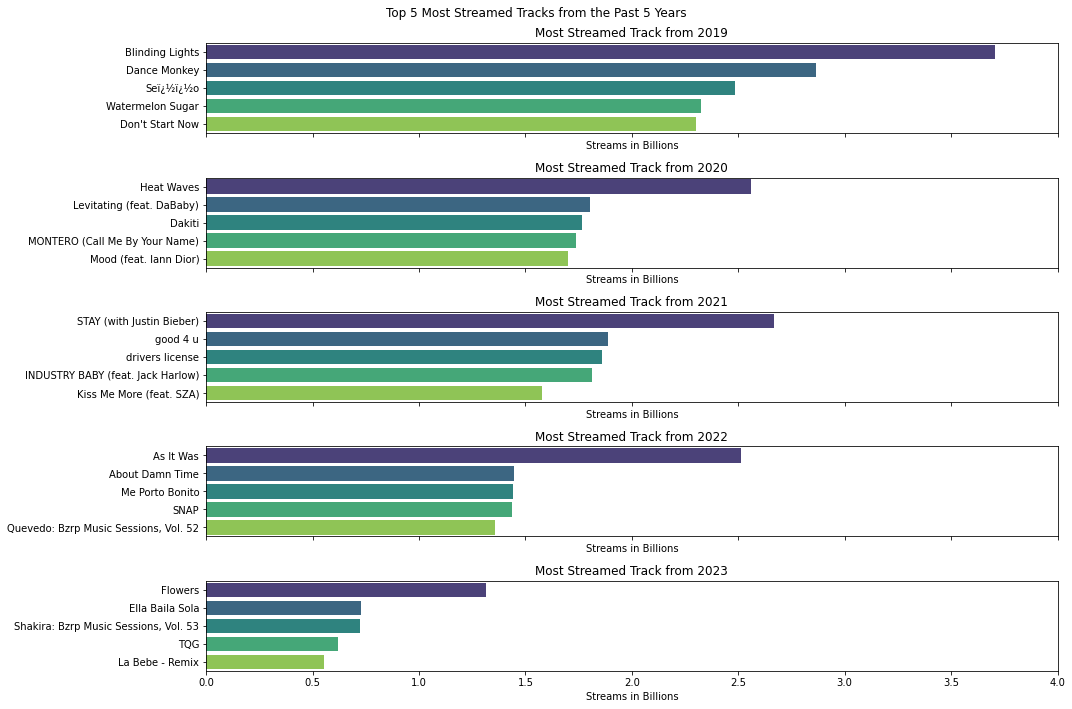

In [11]:
# Convert the 'streams' column to billions of listens
df['streams_million'] = df['streams'] / 1e9  # 1e9 represents one billion

# Group by released year and track name, summing up the streams
x = df.groupby(['released_year', 'track_name'])['streams_million'].sum().reset_index().sort_values(['released_year', 'streams_million'], ascending=[True, False])
x = x[x.released_year > 2018]

# Create subplots
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(15, 10))

count1 = 0

# Iterate over unique released years
for year in x.released_year.unique():
    # Filter data for the current year and take the top 5 tracks
    y = x[x.released_year == year].head()

    # Create a bar plot for the current year
    sns.barplot(ax=ax[count1], data=y, x='streams_million', y='track_name', palette='viridis')
    
    # Set plot labels and title
    ax[count1].set_ylabel('')
    ax[count1].set_xlabel('Streams in Billions')
    ax[count1].title.set_text(f'Most Streamed Track from {year}')
    
    # Add x-axis ticks
    ax[count1].set_xticks(ax[count1].get_xticks())
    
    count1 += 1

# Set the overall title and adjust layout
fig.suptitle('Top 5 Most Streamed Tracks from the Past 5 Years')
fig.tight_layout() 
plt.show()

## Released Tracks (Each Year , 2010-2023)

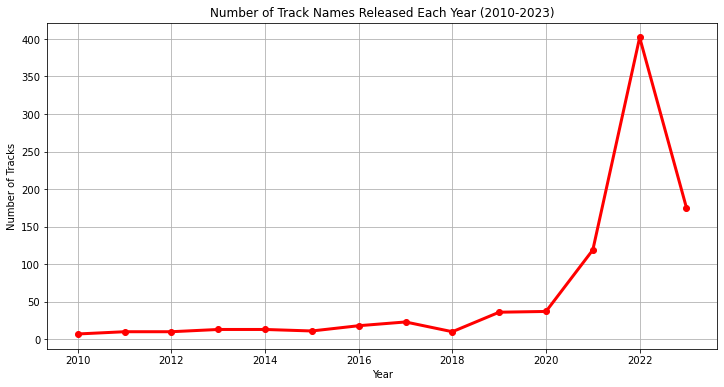

In [12]:
def track_by_year(data_frame, start_year=2010, end_year=2023):
    filtered_data = df[(df['released_year'].astype(float) >= start_year) & (df['released_year'].astype(float) <= end_year)]

    track_counts_by_year = filtered_data.groupby('released_year')['track_name'].count().sort_index()

    
    plt.figure(figsize=(12, 6))
    plt.plot(track_counts_by_year.index, track_counts_by_year, marker='o', color='red',linewidth=3)
    plt.title('Number of Track Names Released Each Year (2010-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Tracks')
    plt.grid(True)
    plt.show()
track_by_year(df)

The line graph presents the number of track names released each year from 2010 to 2023. It displays a relatively stable trend of track releases from 2010 until a slight uptick begins around 2018. A significant surge is observed in 2021, where the number of tracks peaks sharply. This is followed by a drastic decrease in 2022, where the number falls back to levels similar to the period before the surge. This pattern could indicate a specific event or change in the music industry in 2021, such as an increase in digital releases or a change in reporting.

## Is there a correlation between streams and being in playlists

<ipython-input-13-cfc5a14f4800>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[cols].corr()


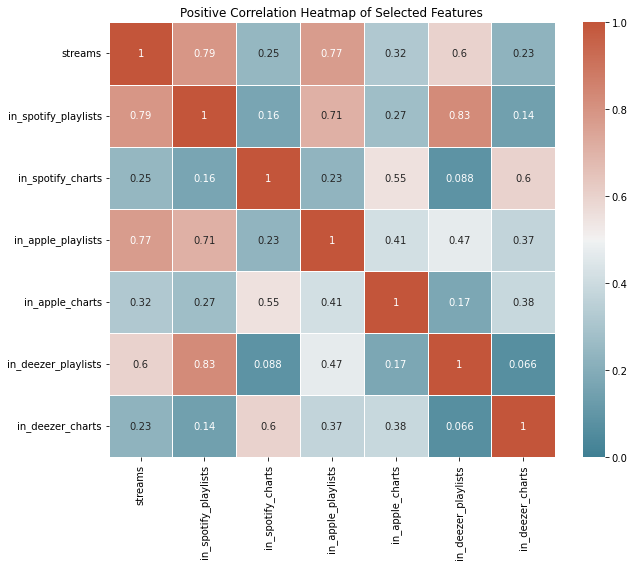

In [13]:
cols = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Create a correlation matrix
corr_matrix = df[cols].corr()

# Set negative correlations to 0
corr_matrix[corr_matrix < 0] = 0

# Set up a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=0, vmax=1, linewidths=.5)

# Add title
plt.title('Positive Correlation Heatmap of Selected Features')

# Show the plot
plt.show()

## Streams for Different Platforms

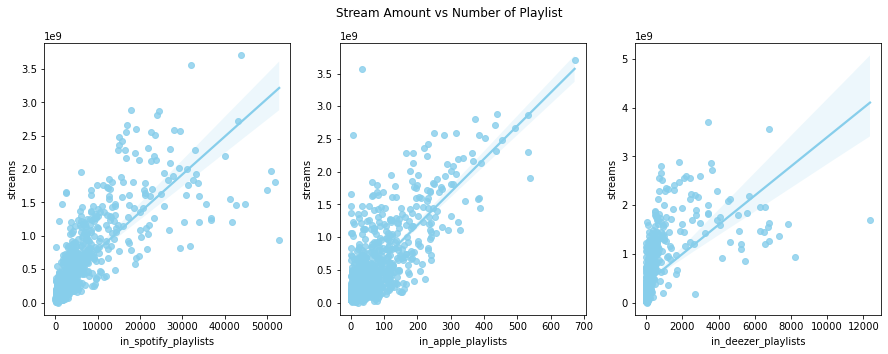

In [14]:
cols = ['in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists']
fig, ax = plt.subplots(1,3,figsize=(15,5))
for count, col in enumerate(cols):
    sns.regplot(data=df,x=col, y='streams', ax=ax[count], color='skyblue')
plt.suptitle('Stream Amount vs Number of Playlist')
plt.show()

The scatter plots compare song streams to playlist appearances across Spotify, Apple Music, and Deezer, revealing a positive correlation on all platforms. Spotify shows the broadest range of playlist counts, while Apple Music has fewer but still shows a positive trend. Deezer exhibits the most variability. Outliers across the platforms suggest factors beyond playlist count also contribute to streaming numbers. Overall, the data suggests that while being featured on playlists is generally beneficial for a song's streaming performance, its impact can vary by platform and other influences.

## Danceability and Bpm

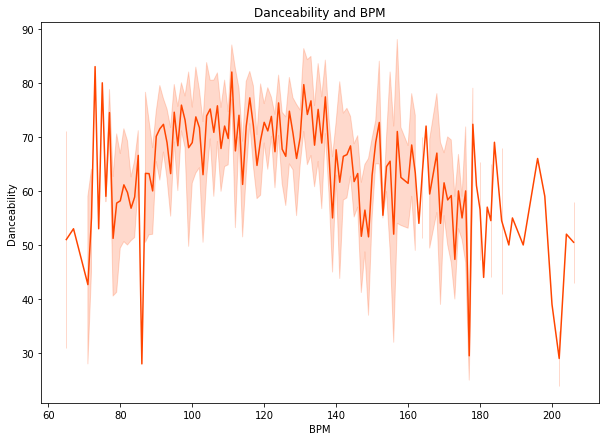

Correlation between danceability between bpm: -0.14762952437003463


In [15]:
bpm_sorted = df.sort_values(by='bpm', ascending=False)

plt.figure(figsize=(10,7))
sns.lineplot(x = 'bpm', y = 'danceability_%', data = bpm_sorted,color='orangered')

plt.title('Danceability and BPM')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.show()

print('Correlation between danceability between bpm:', df['danceability_%'].corr(df['bpm']))

The graph displays the relationship between song danceability and BPM, showing high variability with no clear trend indicating that danceability is dependent on BPM. The broad range in both BPM and danceability scores, along with the wide confidence interval, suggests that factors other than tempo influence a song's danceability.

## Does the BPM of a song influence its total streams?

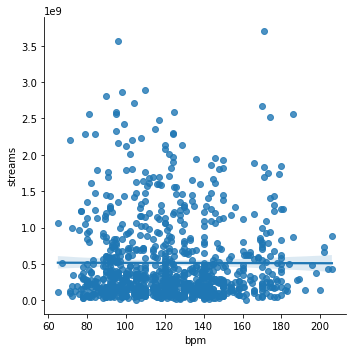

In [16]:
sns.lmplot(y='streams',x='bpm',data=df)

It appears that the BPM does not significantly influence the total streams of a song.



## PairPlot

<Figure size 432x72 with 0 Axes>

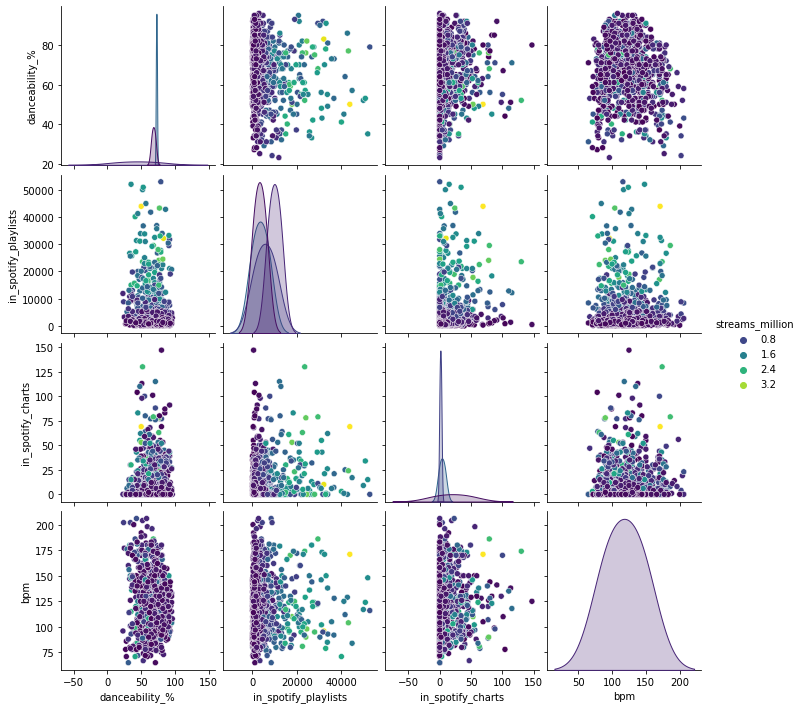

In [17]:
df_pair_params = df.loc[:,['danceability_%', 'in_spotify_playlists','in_spotify_charts', 'bpm','streams_million']]
plt.figure(figsize=(6, 1))
sns.pairplot(data=df_pair_params, hue='streams_million',palette='viridis')
plt.show()

## Correlations between song features

<ipython-input-18-4488980e1144>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[columns].corr()


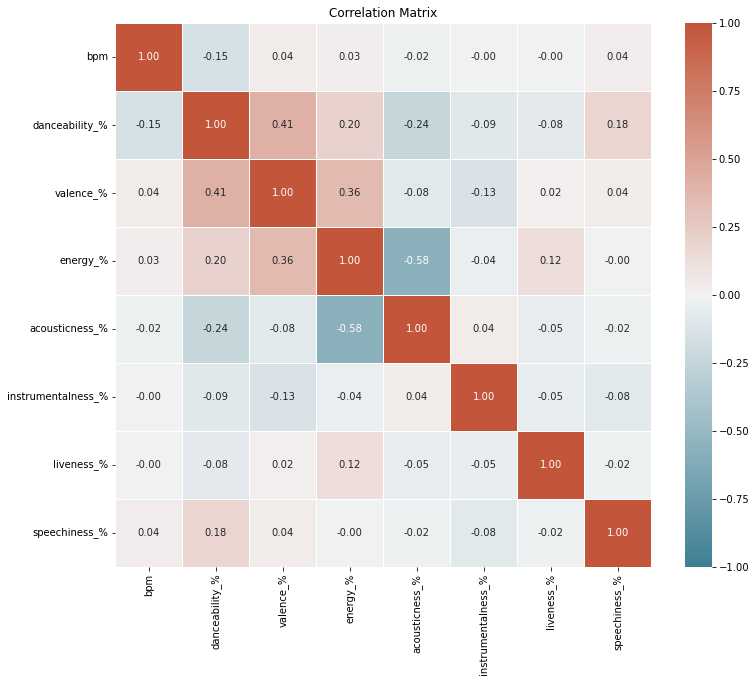

In [18]:
columns = ["bpm", "mode", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
corr_matrix = df[columns].corr()

# Set up a custom color palette similar to the second example
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Set the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap with annotations using the custom color palette
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

## Song Modes

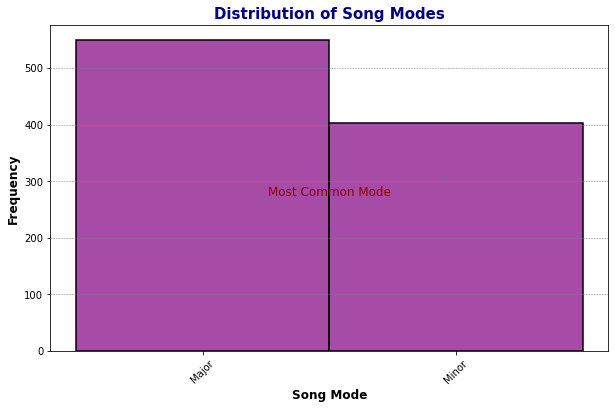

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(df['mode'], color="purple", edgecolor="black", linewidth=1.5, alpha=0.7, binwidth=1)

plt.title('Distribution of Song Modes', fontsize=15, fontweight='bold', color='navy')
plt.xlabel('Song Mode', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.text(0.5, df['mode'].value_counts().max()/2, 'Most Common Mode', fontsize=12, color='darkred', ha='center')

plt.show()


From the chart, it is evident that songs in a major mode are more frequent than those in a minor mode, as indicated by the higher bar for the major mode. This could suggest a preference or trend in the music industry for producing songs in a major key, which is often associated with happier, brighter sounds compared to the more somber or serious tones of minor keys.

## Is top artists style similiar?

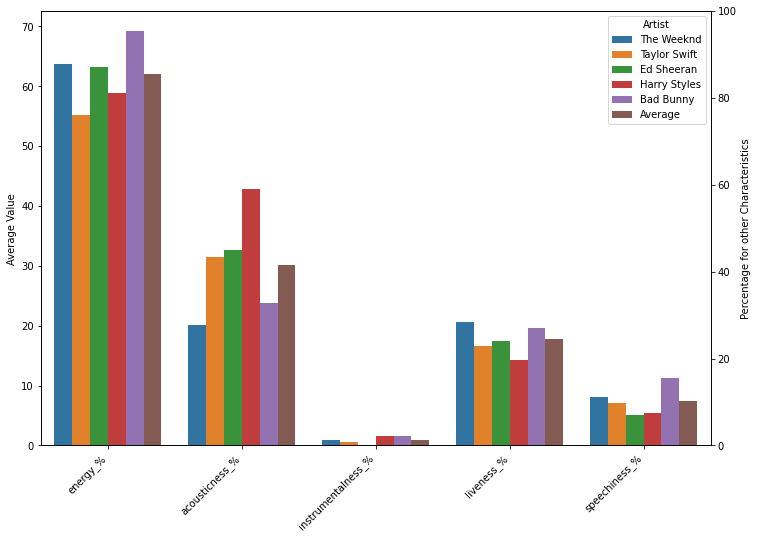

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def get_top5_artists(top_artists_df):
    top5_artists = top_artists_df.head(5)
    top5_artist_names = top5_artists['artist(s)_name'].tolist()
    return top5_artist_names

artists_to_analyze = get_top5_artists(top_artists)

# Create an empty DataFrame to store the averages
averages_df = pd.DataFrame()

# Calculate averages for each artist
for artist in artists_to_analyze:
    artist_data = df.loc[df["artist(s)_name"].str.contains(artist)]
    avg_artist = artist_data.iloc[:,[-10,-7,-6,-5,-4,-3]].mean()
    averages_df[artist] = avg_artist

# Calculate overall average
averages_df["Average"] = averages_df.mean(axis=1)

# Reshape the dataframe from wide to long
averages_df = averages_df.reset_index()
df_long = averages_df.melt(id_vars=["index"])

# Create the visualization
f, ax1 = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=45, ha="right")
sns.barplot(x='index', y='value', data=df_long, hue='variable', ax=ax1)
plt.legend(title="Artist")
plt.ylabel("Average Value")

ax2 = ax1.twinx()
ax2.set_ylabel("Percentage for other Characteristics")
plt.ylim(0, 100)
ax1.set(xlabel=None)

plt.show()

This bar chart compares various characteristics of songs by different artists. The characteristics shown are energy, acousticness, instrumentalness, liveness, and speechiness, which are likely metrics used to analyze the properties of music tracks. 

Energy: All artists have a high average energy level in their songs, with the values ranging closely together. The artist represented by the blue bar (The Weeknd) appears to have the highest average energy, closely followed by the green bar (Taylor Swift).

Acousticness: There is more variation in acousticness among the artists. The green bar (Taylor Swift) stands out with significantly higher acousticness in her songs compared to the other artists. The blue bar (The Weeknd) and the purple bar (Harry Styles) follow after.

Instrumentalness: The chart shows that instrumentalness is generally low for these artists, with the purple bar (Harry Styles) having a slightly higher percentage compared to others.

Liveness: The liveness metric shows less variation, suggesting that live performance elements in the tracks are relatively similar across these artists, with the brown bar (Bad Bunny) having the highest liveness percentage.

Speechiness: Speechiness levels are low for all artists, which is typical for most music unless the genre is heavily focused on spoken word. The brown bar (Bad Bunny) has the highest speechiness, but it is still a small percentage of the overall characteristics.

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;background-color:purple;border:30px;color:white'>The End<h2>